In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import  Lars, OrthogonalMatchingPursuit, SGDRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer

from category_encoders import TargetEncoder
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import svm
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image

from sklearn.tree import export_graphviz
import dtreeviz
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection  import RFE
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
path_train = pd.read_csv('train_house_B.csv')
path_test = pd.read_csv('test_house_B.csv')
display(path_train)
display(path_test)

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.091662,-0.499563,0.161178,0.405623,-0.126718,-0.024866,1.008138,-0.266271,-0.096935,0.167552,...,-0.141322,-0.554035,0.047278,1.421812,0.799192,0.355976,0.224410,1.536388,-0.679063,-0.478408
1,-0.091662,0.077002,0.419463,0.405623,-0.954152,-0.740055,-0.396757,-0.584346,0.759100,-0.581775,...,-0.141322,-0.554035,-1.308863,-0.570187,0.251399,0.355976,-0.929397,1.678171,-0.679063,1.307431
2,-1.406286,1.505583,0.853013,0.405623,-0.126718,2.326442,1.390701,1.495469,-1.667171,-1.525251,...,3.136137,-0.554035,0.047278,1.421812,0.463905,1.517692,2.532024,1.340759,1.472618,-0.478408
3,1.222962,1.387026,0.668524,0.405623,1.006754,-0.024866,0.732728,-0.053591,-1.773094,0.276236,...,-0.141322,1.804941,1.403419,1.421812,0.241826,0.355976,0.224410,0.644806,1.472618,-0.478408
4,-0.091662,-1.159181,0.391790,0.405623,0.666712,1.346730,0.048737,-1.351088,0.638630,0.483270,...,3.136137,-0.554035,1.403419,1.421812,-0.440720,0.355976,2.532024,-0.730109,1.472618,3.093270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-0.091662,0.231875,0.410239,0.405623,-0.126718,-0.730258,0.072631,-1.182195,-0.838603,-1.317578,...,-0.141322,1.804941,0.047278,-0.570187,0.255979,1.517692,-0.929397,-1.611764,-0.679063,-0.478408
133,1.222962,1.621773,1.337297,0.405623,-2.081956,-1.714868,-0.182562,0.027905,-0.794618,-0.901463,...,-0.141322,-0.554035,-1.308863,-0.570187,2.185263,-0.805741,-0.929397,0.238251,-0.679063,1.307431
134,-0.091662,0.566685,0.640850,-2.465344,0.972749,-0.024866,0.995279,-0.004207,-0.946793,0.403477,...,-0.141322,-0.554035,1.403419,1.421812,-0.500889,-0.805741,0.224410,-0.862375,1.472618,-0.478408
135,-0.091662,1.319723,-0.908859,0.405623,0.678047,0.670729,-0.059496,0.483345,-0.914062,-0.412654,...,-1.780051,-0.554035,-1.308863,1.421812,-0.446280,1.517692,-0.929397,-0.516819,-0.679063,1.307431


In [3]:
mask = ['0','2','4', '12','21','22', '24','25','27','20']

In [4]:
X = path_train[mask]
y = path_train['price']

In [5]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate= 0.1, subsample=1.0, max_depth=2, max_features='sqrt')
reg.fit(X, y)

GradientBoostingRegressor(max_depth=2, max_features='sqrt')

In [6]:
df_test = path_test[mask]

In [7]:
y_predict = reg.predict(df_test)
y_predict

array([5237005.34909373, 4303228.39183961, 7453710.91155686,
       7080708.87975782, 7225350.82772058, 3311182.438411  ,
       4142757.74187171, 3762781.94286472, 3617086.05418787,
       4331329.54607447, 5316339.51222135, 4370038.69853334,
       3768416.35441701, 4818306.40844737, 6008887.47087263,
       5570358.80374319, 3175230.62571113, 3256742.6016239 ,
       6866066.4279904 , 3747816.35501456, 4066385.96474302,
       5078256.09240354, 3794049.57329017, 2664123.50026507,
       3637511.86648603, 3617086.05418787, 6372776.48438007,
       3123140.86644013, 5718605.92997683, 5237707.48916156,
       4429446.31891547, 4556647.34225233, 5712622.34128856,
       2466963.50080954, 3752382.86339064, 5502243.07811292,
       3250071.87164996, 3877884.37476272, 3530339.35019168,
       5973254.2295473 , 5851092.01611637, 9250532.89380969,
       3284254.41842962, 4966624.97537617, 3617086.05418787,
       6236419.91064402, 9177600.04881465, 3791595.27525162,
       6322136.79830742,

In [8]:
len(y_predict)

137

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,087,863
 
----------------------
   MAPE Error: 16.39
----------------------


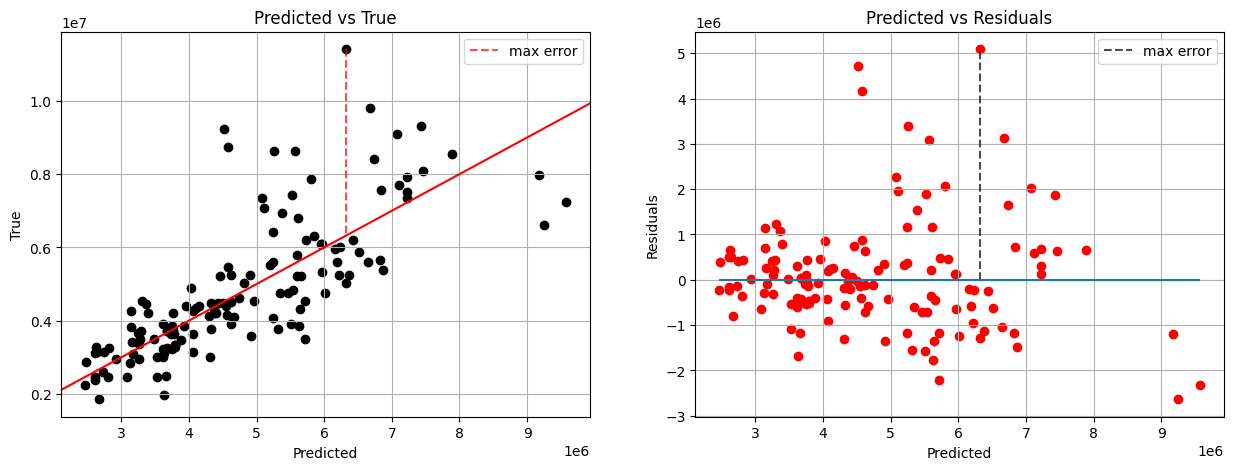

In [9]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [10]:
mask = mask

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
